<a href="https://colab.research.google.com/github/Julialunna/Artificial-Intelligence/blob/main/Federated_Learning/Flower_Course/MNIST_and_FL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
from google.colab import files
files.upload()

Saving utils1.py to utils1.py


{'utils1.py': b'"""\nUtility functions and classes for Jupyter Notebooks lessons. \n"""\n\nimport torch\nimport torch.nn as nn\nfrom torch.utils.data import Subset, DataLoader, random_split\nimport torch.optim as optim\nfrom torchvision import datasets, transforms\nimport numpy as np\nimport matplotlib.pyplot as plt\nfrom sklearn.metrics import confusion_matrix\nimport seaborn as sns\n\ntransform = transforms.Compose(\n    [transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))]\n)\n\n\nclass SimpleModel(nn.Module):\n    def __init__(self):\n        super(SimpleModel, self).__init__()\n        self.fc = nn.Linear(784, 128)\n        self.relu = nn.ReLU()\n        self.out = nn.Linear(128, 10)\n\n    def forward(self, x):\n        x = torch.flatten(x, 1)\n        x = self.fc(x)\n        x = self.relu(x)\n        x = self.out(x)\n        return x\n\n\ndef train_model(model, train_set):\n    batch_size = 64\n    num_epochs = 10\n\n    train_loader = DataLoader(train_set, batch_size=ba

In [5]:
from utils1 import *
trainset = datasets.MNIST(
    "./MNIST_data/", download=True, train=True, transform=transform
)

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9.91M/9.91M [00:00<00:00, 51.4MB/s]


Extracting ./MNIST_data/MNIST/raw/train-images-idx3-ubyte.gz to ./MNIST_data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28.9k/28.9k [00:00<00:00, 2.26MB/s]

Extracting ./MNIST_data/MNIST/raw/train-labels-idx1-ubyte.gz to ./MNIST_data/MNIST/raw



Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1.65M/1.65M [00:00<00:00, 14.1MB/s]


Extracting ./MNIST_data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./MNIST_data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4.54k/4.54k [00:00<00:00, 7.33MB/s]

Extracting ./MNIST_data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./MNIST_data/MNIST/raw



In [6]:
#spliting the dataset for 3 users
total_length = len(trainset)
split_size = total_length // 3

#garantee part1, part2 and part3 will always be divided the same way
torch.manual_seed(42)
part1, part2, part3 = random_split(trainset, [split_size] * 3)

In [7]:
#simulating the different datasets that normally are available in real world
#exclude_digits was provided by utils1
part1 = exclude_digits(part1, excluded_digits=[1,3,7])
part2 = exclude_digits(part2, excluded_digits=[2,5,8])
part3 = exclude_digits(part3, excluded_digits=[4,6,9])

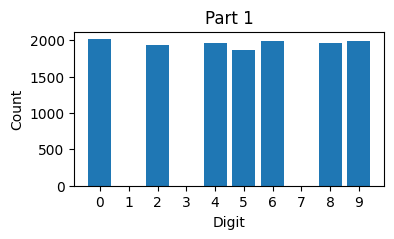

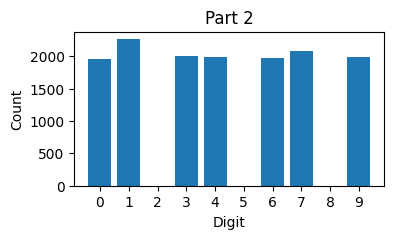

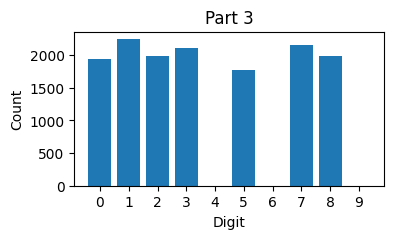

In [8]:
#graphing the plot distribution,function provided by uttils1
plot_distribution(part1, "Part 1")
plot_distribution(part2, "Part 2")
plot_distribution(part3, "Part 3")

In [9]:
#SimpleModel() is a neural network implemented in PyTorch with just two full connected layers
#train_model has 3 epochs
model1 = SimpleModel()
train_model(model1, part1)
model2 = SimpleModel()
train_model(model2, part2)
model3 = SimpleModel()
train_model(model3, part3)

Epoch 1: Loss = 0.5065381982991862
Epoch 2: Loss = 0.24500493563191836
Epoch 3: Loss = 0.191322301380163
Epoch 4: Loss = 0.15809844695031644
Epoch 5: Loss = 0.13128364908314027
Epoch 6: Loss = 0.10998401859298695
Epoch 7: Loss = 0.09561432156451913
Epoch 8: Loss = 0.08321156955302454
Epoch 9: Loss = 0.07043567831779635
Epoch 10: Loss = 0.06046192736126656
Training complete
Epoch 1: Loss = 0.39834976878150236
Epoch 2: Loss = 0.1823559558917103
Epoch 3: Loss = 0.1642766234082436
Epoch 4: Loss = 0.13469189200051396
Epoch 5: Loss = 0.1209725430900497
Epoch 6: Loss = 0.09941596098776374
Epoch 7: Loss = 0.09130579364760447
Epoch 8: Loss = 0.0807794921202003
Epoch 9: Loss = 0.07203043559898756
Epoch 10: Loss = 0.06422328125128322
Training complete
Epoch 1: Loss = 0.5017053658092344
Epoch 2: Loss = 0.264985660476996
Epoch 3: Loss = 0.20764534344879892
Epoch 4: Loss = 0.16485752655310673
Epoch 5: Loss = 0.1395055346006343
Epoch 6: Loss = 0.12051728880452411
Epoch 7: Loss = 0.10085867310932896
E

In [11]:
#Testing model
testset = datasets.MNIST(
    "../MNIST_data/", download=True, train=False, transform=transform
)
#divide tests since we excluded digits for the training tests
testset_137 = include_digits(testset, included_digits=[1,3,7])
testset_258 = include_digits(testset, included_digits=[2,5,8])
testset_469 = include_digits(testset, included_digits=[4,6,9])

# _, ignores the first return value
_, accuracy1 = evaluate_model(model1, testset)
_, accuracy1_on_137 = evaluate_model(model1, testset_137)
print(f"Model 1->Test Accuracy on all digits: {accuracy1:.4f}, "
    f"Test Accuracy on [1,3,7]: {accuracy1_on_137:.4f}")

_, accuracy2 = evaluate_model(model2, testset)
_, accuracy2_on_258 = evaluate_model(model2, testset_258)
print(f"Model 2->Test Accuracy on all digits: {accuracy2:.4f}, "
    f"Test Accuracy on [2,5,8]: {accuracy2_on_258:.4f}")

_, accuracy3 = evaluate_model(model3, testset)
_, accuracy3_on_469 = evaluate_model(model3, testset_469)
print(f"Model 3->Test Accuracy on all digits: {accuracy3:.4f}, "
    f"Test Accuracy on [4,6,9]: {accuracy3_on_469:.4f}")

Model 1->Test Accuracy on all digits: 0.6566, Test Accuracy on [1,3,7]: 0.0000
Model 2->Test Accuracy on all digits: 0.6872, Test Accuracy on [2,5,8]: 0.0000
Model 3->Test Accuracy on all digits: 0.6845, Test Accuracy on [4,6,9]: 0.0000


confusion matrix provides insights into the performance of each model by showing the number of correct and incorrect classifications for each class





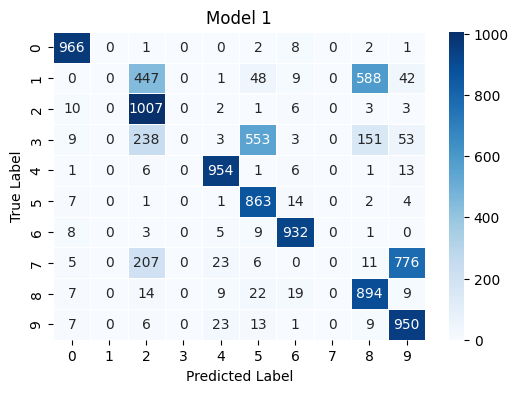

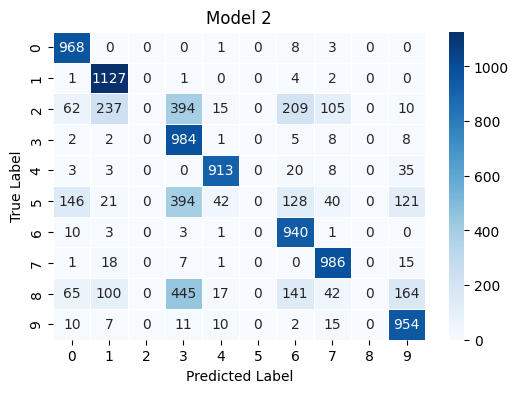

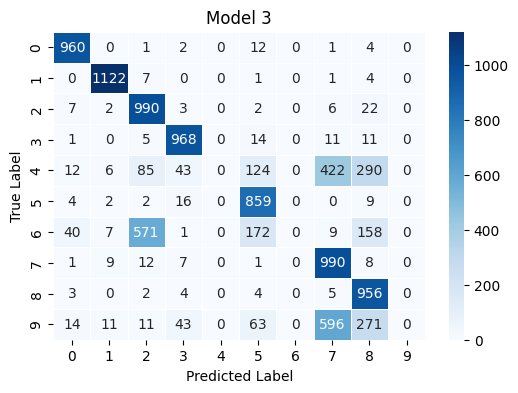

In [12]:
#compute_confusion_matrix and plot _confusion_matrix are provided by utils1
confusion_matrix_model1_all = compute_confusion_matrix(model1, testset)
confusion_matrix_model2_all = compute_confusion_matrix(model2, testset)
confusion_matrix_model3_all = compute_confusion_matrix(model3, testset)

plot_confusion_matrix(confusion_matrix_model1_all, "Model 1")
plot_confusion_matrix(confusion_matrix_model2_all, "Model 2")
plot_confusion_matrix(confusion_matrix_model3_all, "Model 3")
#if there's missing training data, in this cases the model learn to predict the wrong thing